In [2]:
#Categorical variable regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [3]:
path = 'dummy.xlsx'
df = pd.read_excel(path,engine = 'openpyxl')
df.head()

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9


In [4]:
x1 = df['months_since_last_service'].values
x2 = df['type_of_repair']
y = df['repair_time_in_hours'].values

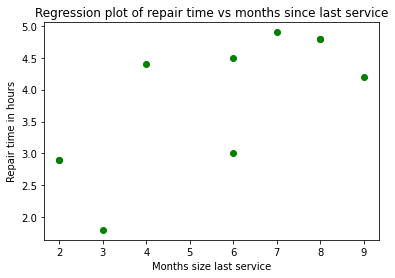

In [5]:
plt.scatter(x1,y,color = 'green')
plt.xlabel('Months size last service')
plt.ylabel('Repair time in hours')
plt.title('Regression plot of repair time vs months since last service')
plt.show()

In [6]:
dummy_var = pd.get_dummies(x2)
dummy_var.head()

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [7]:
df = pd.concat([df,dummy_var],axis=1)
df.drop(['type_of_repair','mechanical'],axis=1)
df.head()

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours,electrical,mechanical
0,1,2,electrical,2.9,1,0
1,2,6,mechanical,3.0,0,1
2,3,8,electrical,4.8,1,0
3,4,3,mechanical,1.8,0,1
4,5,2,electrical,2.9,1,0


In [8]:
x = df[['months_since_last_service','electrical']]
model = sm.OLS(y,x)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              266.6
Date:                Tue, 25 May 2021   Prob (F-statistic):                    4.77e-08
Time:                        23:37:47   Log-Likelihood:                         -6.8665
No. Observations:                  10   AIC:                                      17.73
Df Residuals:                       8   BIC:                                      18.34
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

C:\Users\harsh\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
